# Classic ML Algorithms: SVM & Naïve Bayes


## Import necessary libraries

In [78]:
# Basic data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn related
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # We don't need this one for now
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report 

# NLP Libraries
import nltk
import spacy
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords # I dont want to use this one for now
from nltk.tokenize import word_tokenize
from spacy.lang.en import English

# For saving and loading models
import joblib

#or timing the Code
import time

In [79]:
# load spacy model
nlp = spacy.load('en_core_web_sm')

In [80]:

vectorizer = CountVectorizer

## Load the data

The three datasets are split before and can be imported directly

In [81]:
# Read the data from the tsv file
train_df = pd.read_csv('/Users/hongxuzhou/LfD/LfD_final_Assignment/data_sets/train.tsv', sep='\t')
dev_df = pd.read_csv('/Users/hongxuzhou/LfD/LfD_final_Assignment/data_sets/dev.tsv', sep='\t')
test_df = pd.read_csv('/Users/hongxuzhou/LfD/LfD_final_Assignment/data_sets/test.tsv', sep = '\t') 


Prepare features and labels for each set

In [82]:
X_train = train_df.iloc[:, 0] # The first column is the tweets
y_train = train_df.iloc[:, 1] # The second column is the labels

# Follow the same steps for the dev set
X_dev = dev_df.iloc[:, 0]
y_dev = dev_df.iloc[:, 1]

# Follow the same steps for the test set
X_test = test_df.iloc[:, 0]
y_test = test_df.iloc[:, 1]

# Map the labels to integers
label_map = {'OFF': 1, 'NOT': 0}
y_train = y_train.map(label_map)
y_dev = y_dev.map(label_map)
y_test = y_test.map(label_map)

# Save the labels fro classification report
class_names = ['Offensive', 'Not Offensive']

## Feature engineering

## Main function

## Test 1 BOW implementation

First step, create a basic pipeline

```
# Create a basic pipeline of Bag of Words and Naive Bayes
basic_pipeline = Pipeline([
    ('vectorizer', CountVectorizer( # Convert the tweets into a sparse matrix using bag of words
        ngram_range=(1, 2), # Use unigrams and bigrams
        min_df=2, # Ignore terms that have a document frequency strictly lower than the given threshold
        max_df=0.95, # Ignore terms that have a document frequency strictly higher than the given threshold
    )), 
    ('classifier', MultinomialNB()) # Use Naive Bayes as the classifier
])

# Train the model
basic_pipeline.fit(X_train, y_train)

# Predict the dev set
y_dev_pred = basic_pipeline.predict(X_dev)
```

## Test 2 -- TF-IDF  
Use the optimised parameters 

In [83]:
# Create pipeline with TF-IDF
tfidf_pipeline = Pipeline([
    ('Vectorizer', TfidfVectorizer(
        ngram_range = (1, 2),
        min_df = 2,
        max_df = 0.95,
        #TF-IDF specific parameters
        sublinear_tf = True, # Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)
        norm = 'l2', # Apply l2 normalization
        use_idf = True, # Enable IDF weighting
    )),
    ('Classifier', MultinomialNB(
        class_prior=[0.35, 0.65] # Weights for the classes -- change from the original default
    ))
])

# Train the model
tfidf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = tfidf_pipeline.predict(X_dev)

# Results  

In [84]:
# Evaluate the model
print('Train Accuracy:', tfidf_pipeline.score(X_train, y_train))
print('Dev Accuracy:', accuracy_score(y_dev, y_dev_pred))
print(classification_report(y_dev, y_dev_pred, target_names=class_names))

Train Accuracy: 0.8681264809216439
Dev Accuracy: 0.6756756756756757
               precision    recall  f1-score   support

    Offensive       0.78      0.69      0.73       647
Not Offensive       0.53      0.65      0.59       352

     accuracy                           0.68       999
    macro avg       0.66      0.67      0.66       999
 weighted avg       0.70      0.68      0.68       999



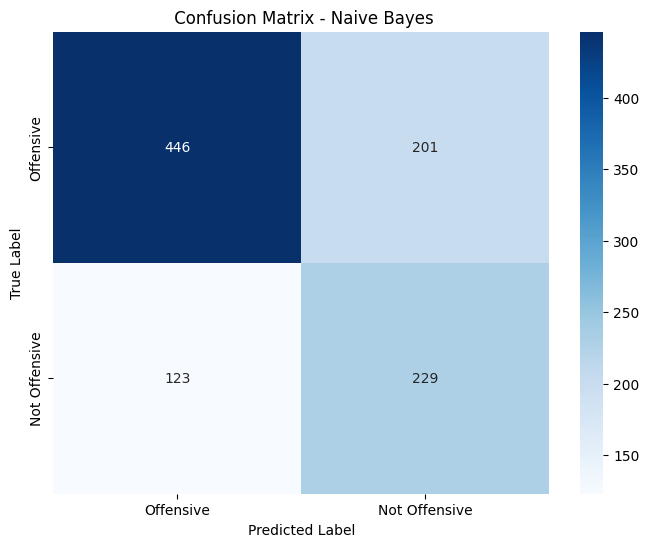

In [85]:
# Confusion matrix visualisation 
def plot_confusion_matrix(y_true, y_pred, title = ' Confusion Matrix - Naive Bayes'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    

# Show the confusion matrix
plot_confusion_matrix(y_dev, y_dev_pred)

# Ad hoc check  
To ensure that I didn't make any stupid mistake like turning the class names around

In [86]:
# Get predictions
y_dev_pred = tfidf_pipeline.predict(X_dev)

# Print some examples (showing the text, true label, and predicted label)
print("Example Predictions:")
print("-" * 100)  # Separator line
for text, true_label, pred_label in zip(X_dev[:10], y_dev[:10], y_dev_pred[:10]):
    print(f"Text: {text[:100]}...")  # Only show first 100 characters to keep output readable
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")
    print(f"Correct prediction: {true_label == pred_label}")
    print("-" * 100)  # Separator line

# Also print some statistics
print("\nConfusion Matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_dev, y_dev_pred))

Example Predictions:
----------------------------------------------------------------------------------------------------
Text: @USER He is not a troll he is simply dumb but I’m enjoying it I love tweeter for this 🤣🤣🤣🤣🤣🤣🤣...
True label: 1
Predicted label: 0
Correct prediction: False
----------------------------------------------------------------------------------------------------
Text: @USER I understand Annie she is stuck in between ! I understand her !...
True label: 0
Predicted label: 0
Correct prediction: True
----------------------------------------------------------------------------------------------------
Text: @USER @USER Hillary was blaming women not too long ago.  Better hope the Uneducated" don't show up t...
True label: 1
Predicted label: 0
Correct prediction: False
----------------------------------------------------------------------------------------------------
Text: @USER @USER I support Jahs blessings on his hussle ....he is d bomb...
True label: 1
Predicted label: